In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Chemin du répertoire principal de vos images
root_dir = "/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/GROUPED_IMAGES_PBC_APL_prep"

# Chemins des répertoires pour les ensembles d'entraînement, de validation et de test
train_dir = '/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/GROUPED_IMAGES_PBC_APL_prep_train'
val_dir = '/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/GROUPED_IMAGES_PBC_APL_prep_val'
test_dir = '/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/GROUPED_IMAGES_PBC_APL_prep_test'


# Création du modèle CNN personnalisé

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Configuration des callbacks pour les checkpoints
checkpoint_path = "/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

# Charger le modèle CNN initial
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # Nombre de classes
])

# Compilation du modèle CNN initial
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle CNN initial
model_cnn.summary()

# Générateur d'images pour l'entraînement
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des images

# Charger les données d'entraînement, de validation et de test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

# Entraînement initial du modèle CNN initial
history_initial = model_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size)

# Fine-tuning du modèle CNN initial
model_cnn.layers[-1].trainable = True  # Permettez au modèle entier d'être entraînable si nécessaire

# Recompilation du modèle pour le fine-tuning
model_cnn.compile(optimizer=Adam(learning_rate=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Entraînement pour le fine-tuning avec le checkpoint
history_fine = model_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=25,  # Ajustez selon vos besoins
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
    callbacks=[checkpoint_callback])  # Ajoutez le callback ici aussi


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

/Users/michaelderoche/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


696/696 [==============================] - 1237s 2s/step - loss: 0.1572 - accuracy: 0.9511 - val_loss: 0.3714 - val_accuracy: 0.8877
Epoch 2/25
696/696 [==============================] - ETA: 0s - loss: 0.1365 - accuracy: 0.9557
Epoch 2: val_accuracy improved from 0.88767 to 0.88993, saving model to /Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-02-0.89.h5
696/696 [==============================] - 1237s 2s/step - loss: 0.1365 - accuracy: 0.9557 - val_loss: 0.3738 - val_accuracy: 0.8899
Epoch 3/25
696/696 [==============================] - ETA: 0s - loss: 0.1334 - accuracy: 0.9580
Epoch 3: val_accuracy improved from 0.88993 to 0.89062, saving model to /Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-03-0.89.h5
696/696 [==============================] - 1316s 2s/step - loss: 0.1334 - accuracy: 0.9580 - val_los

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Assurez-vous que cela correspond à la taille de vos images d'entraînement
    batch_size=32,
    class_mode='categorical',  # Ou 'binary' si vous avez deux classes seulement
    shuffle=False  # Il est important de ne pas mélanger les données lors de l'évaluation
)

loss, accuracy = model_cnn.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Found 2880 images belonging to 9 classes.
90/90 [==============================] - 33s 365ms/step - loss: 0.4041 - accuracy: 0.8958
Test Loss: 0.4041
Test Accuracy: 0.8958


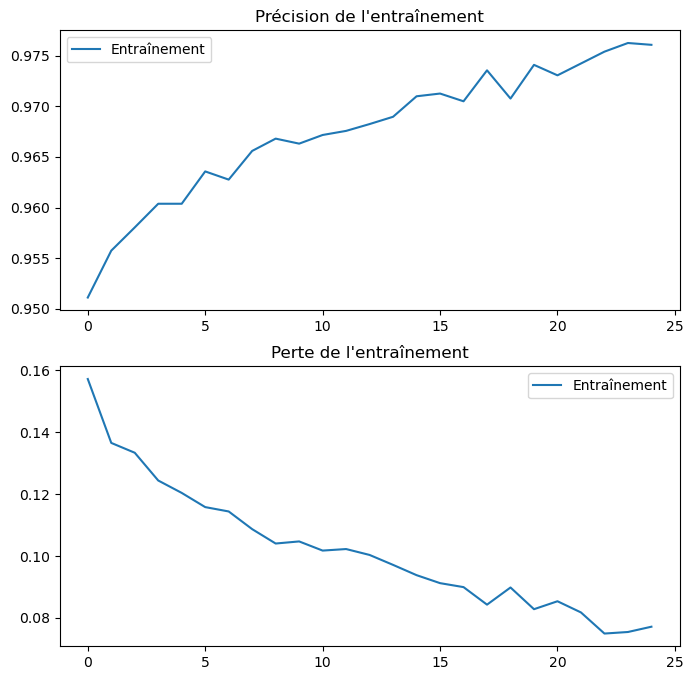

In [ ]:
import matplotlib.pyplot as plt

# Récupération des données d'entraînement de history2
acc = history_fine.history['accuracy']
loss = history_fine.history['loss']

# Configuration des graphiques
plt.figure(figsize=(8, 8))

# Graphique pour la précision
plt.subplot(2, 1, 1)
plt.plot(acc, label='Entraînement')
plt.title('Précision de l\'entraînement')
plt.legend()

# Graphique pour la perte
plt.subplot(2, 1, 2)
plt.plot(loss, label='Entraînement')
plt.title('Perte de l\'entraînement')
plt.legend()

# Affichage des graphiques
plt.show()


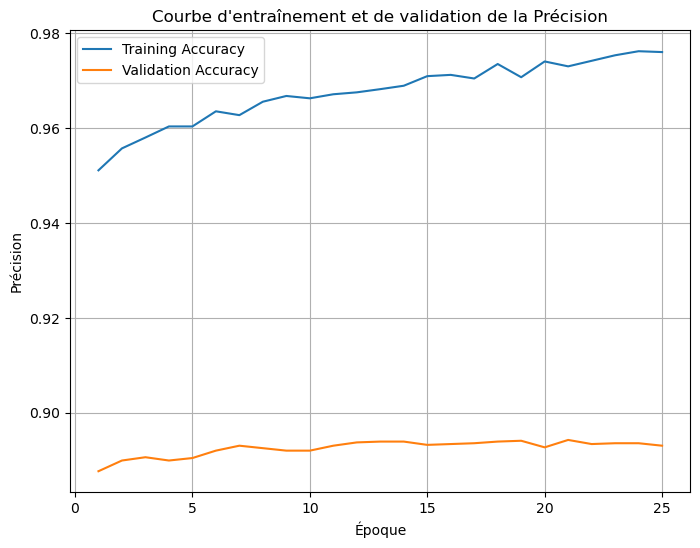

In [ ]:
import matplotlib.pyplot as plt

# Récupération des données d'entraînement et de validation
train_acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Configuration du graphique
plt.figure(figsize=(8, 6))

# Tracé de la courbe d'entraînement
plt.plot(epochs, train_acc, label='Training Accuracy', linestyle='-')
# Tracé de la courbe de validation
plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='-')

plt.title('Courbe d\'entraînement et de validation de la Précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tqdm import tqdm
import numpy as np

# Charger le modèle CNN pré-entraîné
model_path = '/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5'
best_model = load_model(model_path)

# Générateur d'images pour l'entraînement
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des images

# Charger les données d'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

# Récupérer les indices des échantillons
sample_indices = np.arange(len(train_generator.filenames))

# Créer un validateur croisé stratifié
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Définir la fonction de score pour la validation croisée
def custom_scorer(model, X, y):
    _, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

# Évaluer le meilleur modèle en utilisant la validation croisée avec tqdm
scores = []
for train_idx, val_idx in tqdm(cv.split(sample_indices, train_generator.classes), total=cv.get_n_splits()):
    X_train, y_train = [], []
    X_val, y_val = [], []

    for idx in train_idx:
        X, y = train_generator.next()
        X_train.append(X)
        y_train.append(y)

    for idx in val_idx:
        X, y = train_generator.next()
        X_val.append(X)
        y_val.append(y)

    X_train = np.vstack(X_train)
    y_train = np.vstack(y_train)

    X_val = np.vstack(X_val)
    y_val = np.vstack(y_val)

    # Évaluer le meilleur modèle sur le pli actuel et stocker la précision
    _, accuracy = best_model.evaluate(X_val, y_val, verbose=0)
    scores.append(accuracy)

# Afficher les scores de validation croisée
print("Scores de validation croisée :", scores)
print("Précision moyenne :", np.mean(scores))


Found 22290 images belonging to 9 classes.


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Charger votre modèle entraîné
model_path = ('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5')
model = load_model(model_path)

# Définir le chemin du répertoire de test et le générateur de test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important pour garder les étiquettes alignées avec les sorties
)

# Obtenir les prédictions du modèle
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size))

# Obtenir les classes prédites
predicted_classes = np.argmax(predictions, axis=1)

# Obtenir les vraies classes
true_classes = test_generator.classes

# Obtenir les labels des classes
class_labels = list(test_generator.class_indices.keys())

# Afficher la correspondance des classes
print("Correspondance des classes dans test_generator:")
for label, index in test_generator.class_indices.items():
    print(f"Classe {label} a l'indice {index}")

# Comparer les prédictions avec les vraies classes
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 2880 images belonging to 9 classes.
90/90 [==============================] - 36s 400ms/step
Correspondance des classes dans test_generator:
Classe Basophil a l'indice 0
Classe Blast, no lineage spec a l'indice 1
Classe Eosinophil a l'indice 2
Classe Erythroblast a l'indice 3
Classe Ig a l'indice 4
Classe Monocyte a l'indice 5
Classe Neutrophil a l'indice 6
Classe Platelet a l'indice 7
Classe lymphocyte a l'indice 8
                        precision    recall  f1-score   support

              Basophil       0.82      0.91      0.86       127
Blast, no lineage spec       0.81      0.87      0.84       329
            Eosinophil       1.00      0.94      0.97       322
          Erythroblast       0.95      0.87      0.91       207
                    Ig       0.78      0.77      0.78       383
              Monocyte       0.84      0.82      0.83       273
            Neutrophil       0.93      0.93      0.93       541
              Platelet       0.97      0.98      0.97       23

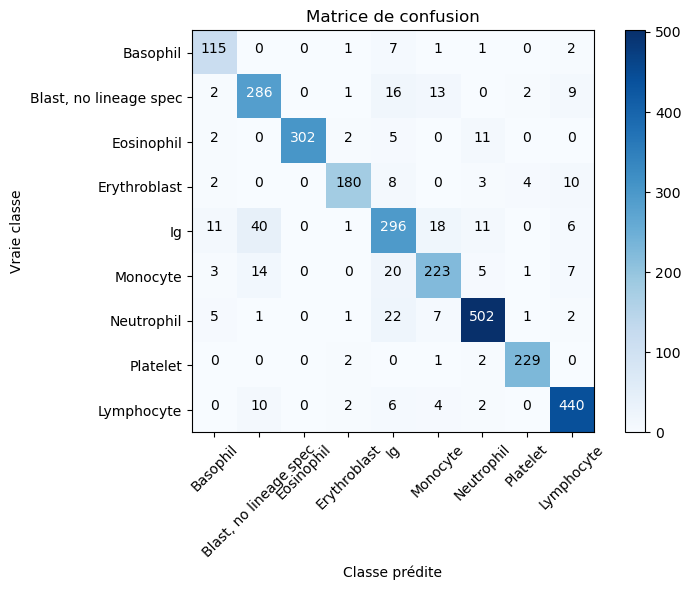

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Remplacez class_labels par la liste de vos noms de classe dans l'ordre attendu
class_labels = ['Basophil', 'Blast, no lineage spec', 'Eosinophil', 'Erythroblast', 'Ig', 'Monocyte', 'Neutrophil', 'Platelet', 'Lymphocyte']

# Créer une matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()

# Ajouter des labels d'axe
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Ajouter les valeurs annotées dans les cellules
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.xlabel('Classe prédite')
plt.ylabel('Vraie classe')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
# Génération et affichage de la matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)
conf_matrix

array([[115,   0,   0,   1,   7,   1,   1,   0,   2],
       [  2, 286,   0,   1,  16,  13,   0,   2,   9],
       [  2,   0, 302,   2,   5,   0,  11,   0,   0],
       [  2,   0,   0, 180,   8,   0,   3,   4,  10],
       [ 11,  40,   0,   1, 296,  18,  11,   0,   6],
       [  3,  14,   0,   0,  20, 223,   5,   1,   7],
       [  5,   1,   0,   1,  22,   7, 502,   1,   2],
       [  0,   0,   0,   2,   0,   1,   2, 229,   0],
       [  0,  10,   0,   2,   6,   4,   2,   0, 440]])

In [ ]:
# Affichez les indices des classes
class_indices = train_generator.class_indices
print("Classes et indices:", class_indices)

Classes et indices: {'Basophil': 0, 'Blast, no lineage spec': 1, 'Eosinophil': 2, 'Erythroblast': 3, 'Ig': 4, 'Monocyte': 5, 'Neutrophil': 6, 'Platelet': 7, 'lymphocyte': 8}


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

# Chargement du modèle
model = load_model('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5')

# Préparation des images
def prepare_image(file_path):
    try:
        img = load_img(file_path, target_size=(256, 256))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Erreur avec l'image {file_path}: {e}")
        return None

# Rassembler tous les chemins des fichiers image
image_paths = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.lower().endswith(('.tif', '.jpg')):
            image_paths.append(os.path.join(root, file))




# Statistiques pour chaque classe
correct_predictions_per_class = {name: 0 for name in class_names.values()}
total_predictions_per_class = {name: 0 for name in class_names.values()}
well_predicted_images = []
poorly_predicted_images = []

# Analyser les prédictions
total_correct_predictions = 0
total_predictions = 0

with tqdm(total=len(image_paths), desc="Traitement de l'ensemble des images") as pbar:
    for file_path in image_paths:
        prepared_img = prepare_image(file_path)
        if prepared_img is not None:
            prediction = model.predict(prepared_img, verbose=0)
            predicted_class_index = np.argmax(prediction)
            predicted_class_name = class_names.get(predicted_class_index)

            real_class_name = get_real_label(file_path)
            if real_class_name in total_predictions_per_class:
                total_predictions_per_class[real_class_name] += 1
                total_predictions += 1

                if predicted_class_name == real_class_name:
                    correct_predictions_per_class[real_class_name] += 1
                    total_correct_predictions += 1
                    well_predicted_images.append(file_path)
                else:
                    poorly_predicted_images.append(file_path)
            else:
                print(f"Classe non reconnue: {real_class_name} dans le fichier {file_path}")
        pbar.update(1)

# Afficher les résultats
print("Précision globale du modèle : {:.2f}%".format((total_correct_predictions / total_predictions) * 100))
for class_name in total_predictions_per_class:
    if total_predictions_per_class[class_name] > 0:
        accuracy = (correct_predictions_per_class[class_name] / total_predictions_per_class[class_name]) * 100
        print(f"Précision pour {class_name}: {accuracy:.2f}%")
    else:
        print(f"Précision pour {class_name}: N/A (aucune prédiction)")

# Fonction pour afficher les images
def display_images(image_paths):
    plt.figure(figsize=(12, 4))
    for i, file_path in enumerate(image_paths):
        img = load_img(file_path, target_size=(256, 256))
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(file_path))
        plt.axis('off')
    plt.show()


Traitement de l'ensemble des images: 100%|██████████| 2880/2880 [05:13<00:00,  9.19it/s]

Précision globale du modèle : 63.51%
Précision pour Basophil: 95.28%
Précision pour Blast, no lineage spec: 9.73%
Précision pour Eosinophil: 96.58%
Précision pour Erythroblast: 28.02%
Précision pour Ig: 76.50%
Précision pour Monocyte: 27.84%
Précision pour Neutrophil: 93.53%
Précision pour Platelet: 98.29%
Précision pour lymphocyte: 43.53%


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Charger votre modèle entraîné
model_path = ('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/model/model_CNN_best_1.keras')
model = load_model(model_path)

# Définir le chemin du répertoire de test et le générateur de test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important pour garder les étiquettes alignées avec les sorties
)

# Obtenir les prédictions du modèle
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size))

# Obtenir les classes prédites
predicted_classes = np.argmax(predictions, axis=1)

# Obtenir les vraies classes
true_classes = test_generator.classes

# Obtenir les labels des classes
class_labels = list(test_generator.class_indices.keys())

# Afficher la correspondance des classes
print("Correspondance des classes dans test_generator:")
for label, index in test_generator.class_indices.items():
    print(f"Classe {label} a l'indice {index}")

# Comparer les prédictions avec les vraies classes
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 2880 images belonging to 9 classes.
90/90 [==============================] - 36s 398ms/step
Correspondance des classes dans test_generator:
Classe Basophil a l'indice 0
Classe Blast, no lineage spec a l'indice 1
Classe Eosinophil a l'indice 2
Classe Erythroblast a l'indice 3
Classe Ig a l'indice 4
Classe Monocyte a l'indice 5
Classe Neutrophil a l'indice 6
Classe Platelet a l'indice 7
Classe lymphocyte a l'indice 8
                        precision    recall  f1-score   support

              Basophil       0.91      0.87      0.89       127
Blast, no lineage spec       0.77      0.91      0.84       329
            Eosinophil       0.99      0.95      0.97       322
          Erythroblast       0.97      0.86      0.92       207
                    Ig       0.78      0.77      0.77       383
              Monocyte       0.79      0.85      0.82       273
            Neutrophil       0.95      0.91      0.93       541
              Platelet       0.98      0.99      0.99       23

In [ ]:
# Génération et affichage de la matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)
conf_matrix

array([[111,   0,   0,   0,  11,   1,   0,   1,   3],
       [  0, 300,   0,   1,   8,  15,   0,   0,   5],
       [  2,   0, 305,   0,   3,   0,  11,   0,   1],
       [  1,   1,   0, 179,   9,   1,   2,   2,  12],
       [  4,  50,   0,   0, 293,  25,   5,   0,   6],
       [  3,  16,   0,   0,  15, 233,   2,   0,   4],
       [  0,   1,   3,   1,  31,   7, 493,   1,   4],
       [  1,   0,   0,   1,   0,   0,   1, 231,   0],
       [  0,  20,   0,   2,   8,  12,   3,   0, 419]])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

# Chargement du modèle
model = load_model('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5')

# Préparation des images
def prepare_image(file_path):
    try:
        img = load_img(file_path, target_size=(256, 256))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Erreur avec l'image {file_path}: {e}")
        return None

# Rassembler tous les chemins des fichiers image
image_paths = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.lower().endswith(('.tif', '.jpg')):
            image_paths.append(os.path.join(root, file))

def get_real_label(file_path):
    file_name = os.path.basename(file_path)
    label_part = file_name.split('_')[0]

    # Mappage des abréviations aux noms des classes
    label_mappings = {
    'BA': 'Basophil',
    'BL': 'Blast, no lineage spec',
    'SNE': 'Neutrophil',
    'BNE': 'Neutrophil',
    'NEUTROPHIL': 'Neutrophil',
    'PMY': 'Ig',
    'MY': 'Ig',
    'MMY': 'Ig',
    'IG': 'Ig',
    'PMO': 'Ig',
    'MO': 'Monocyte',
    'EO': 'Eosinophil',
    'ERB': 'Erythroblast',
    'LY': 'lymphocyte',
    'PLATELET': 'Platelet',
    }

    return label_mappings.get(label_part.upper(), 'Inconnu')

# Mappage des indices de classe à leurs noms
class_names = {
    0: 'Basophil',
    1: 'Blast, no lineage spec',
    2: 'Eosinophil',
    3: 'Erythroblast',
    4: 'Ig',
    5: 'Monocyte',
    6: 'Neutrophil',
    7: 'Platelet',
    8: 'lymphocyte'
}

# Statistiques pour chaque classe
correct_predictions_per_class = {name: 0 for name in class_names.values()}
total_predictions_per_class = {name: 0 for name in class_names.values()}
well_predicted_images = []
poorly_predicted_images = []

# Analyser les prédictions
total_correct_predictions = 0
total_predictions = 0

with tqdm(total=len(image_paths), desc="Traitement de l'ensemble des images") as pbar:
    for file_path in image_paths:
        prepared_img = prepare_image(file_path)
        if prepared_img is not None:
            prediction = model.predict(prepared_img, verbose=0)
            predicted_class_index = np.argmax(prediction)
            predicted_class_name = class_names.get(predicted_class_index)

            real_class_name = get_real_label(file_path)
            if real_class_name in total_predictions_per_class:
                total_predictions_per_class[real_class_name] += 1
                total_predictions += 1

                if predicted_class_name == real_class_name:
                    correct_predictions_per_class[real_class_name] += 1
                    total_correct_predictions += 1
                    well_predicted_images.append(file_path)
                else:
                    poorly_predicted_images.append(file_path)
            else:
                print(f"Classe non reconnue: {real_class_name} dans le fichier {file_path}")
        pbar.update(1)

# Afficher les résultats
print("Précision globale du modèle : {:.2f}%".format((total_correct_predictions / total_predictions) * 100))
for class_name in total_predictions_per_class:
    if total_predictions_per_class[class_name] > 0:
        accuracy = (correct_predictions_per_class[class_name] / total_predictions_per_class[class_name]) * 100
        print(f"Précision pour {class_name}: {accuracy:.2f}%")
    else:
        print(f"Précision pour {class_name}: N/A (aucune prédiction)")

# Fonction pour afficher les images
def display_images(image_paths):
    plt.figure(figsize=(12, 4))
    for i, file_path in enumerate(image_paths):
        img = load_img(file_path, target_size=(256, 256))
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(file_path))
        plt.axis('off')
    plt.show()


Traitement de l'ensemble des images: 100%|██████████| 2880/2880 [10:41<00:00,  4.49it/s]

Précision globale du modèle : 63.51%
Précision pour Basophil: 95.28%
Précision pour Blast, no lineage spec: 9.73%
Précision pour Eosinophil: 96.58%
Précision pour Erythroblast: 28.02%
Précision pour Ig: 76.50%
Précision pour Monocyte: 27.84%
Précision pour Neutrophil: 93.53%
Précision pour Platelet: 98.29%
Précision pour lymphocyte: 43.53%


# 😎 MAKE GRADCAM GREAT AGAIN

In [ ]:
model = load_model('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

Veuillez entrer le chemin de votre image :  /Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/GROUPED_IMAGES_PBC_APL_prep_train/Basophil/BA_47.jpg


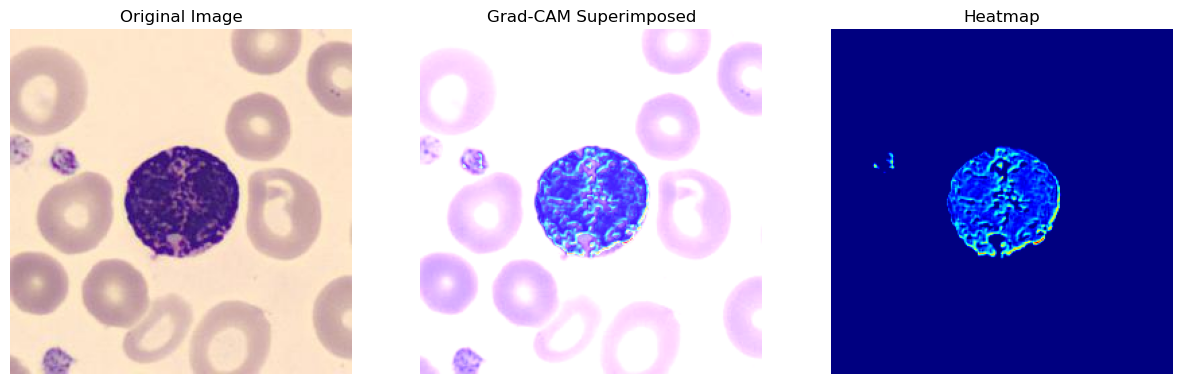

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display
from PIL import Image as PILImage
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load your pre-trained model
model = load_model('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5')

def prepare_image(img_path, target_size=(256, 256)):
    # Préparer l'image pour l'entrée du modèle
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Créer un modèle qui mappe l'image d'entrée aux activations de la dernière couche convolutive
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Calculer le gradient de la classe prédite en haut pour notre image d'entrée
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Gradient du neurone de sortie par rapport à la dernière couche convolutive
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Vecteur de l'intensité moyenne du gradient sur les canaux de la carte de caractéristiques
    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))

    # Multiplier les gradients par les activations de la couche
    # On étend pooled_grads pour qu'il ait 4 dimensions
    pooled_grads_expanded = tf.expand_dims(tf.expand_dims(pooled_grads, 1), 1)
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads_expanded, last_conv_layer_output), axis=-1)

    # Enlevez la dimension de batch et normalisez la heatmap
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Fonction save_and_display_gradcam mise à jour
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Convertissez la heatmap en uint8 et appliquez la carte de couleurs
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Charger l'image originale et superposer la heatmap
    original_img = cv2.imread(img_path)
    superimposed_img = cv2.addWeighted(original_img, 1.0, heatmap_color, alpha, 0)

    # Sauvegarder et afficher l'image superposée
    cv2.imwrite(cam_path, superimposed_img)
    display(PILImage.open(cam_path))

# Utilisation des fonctions
img_path = input("Veuillez entrer le chemin de votre image : ")
img_array = prepare_image(img_path)
last_conv_layer_name = 'conv2d_6'
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Charger l'image originale et superposer la heatmap
original_img = cv2.imread(img_path)
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(original_img, 1.2, heatmap_color, 0.8, 0)

# Assurez-vous que superimposed_img est en uint8 avant de l'afficher
superimposed_img_uint8 = np.clip(superimposed_img, 0, 255).astype('uint8')

# Afficher l'image originale, la heatmap superposée, et la heatmap seule
plt.figure(figsize=(15, 5))

# Afficher l'image originale
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Afficher la heatmap superposée
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(superimposed_img_uint8, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM Superimposed')
plt.axis('off')

# Afficher la heatmap seule
heatmap_only = np.clip(heatmap_color, 0, 255).astype('uint8')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(heatmap_only, cv2.COLOR_BGR2RGB))
plt.title('Heatmap')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 121ms/step


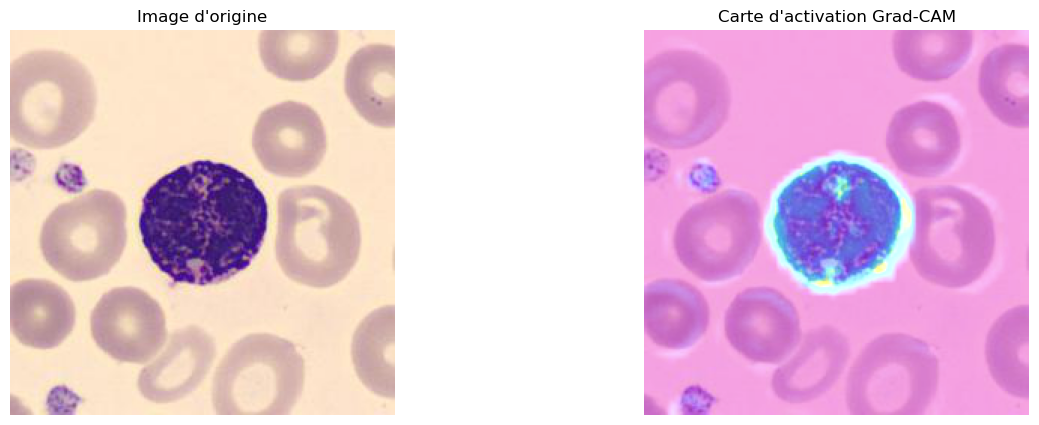

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tf_explain.core.grad_cam import GradCAM
import cv2
import numpy as np

# Spécifiez le chemin de votre image
image_path = '/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/GROUPED_IMAGES_PBC_APL_prep_train/Basophil/BA_47.jpg'

# Chargez l'image
image = load_img(image_path, target_size=(256, 256))
img_array = img_to_array(image)
img_array /= 255.0  # Normalisez l'image comme dans la préparation des données d'entraînement

# Chargement du modèle
model = load_model('/Users/michaelderoche/Documents/MACHINE LEARNING ENGINEER/DATA SCIENTIST/PROJET BLOODCELLS/DATASETS SOURCES/PBC_APL/checkpoints/CNN/model-21-0.89.h5')

# Créez une instance de GradCAM
explainer = GradCAM()

# Obtenez la classe prédite par le modèle
predicted_class = model.predict(img_array.reshape(1, 256, 256, 3)).argmax()

# Générez la carte d'activation Grad-CAM
grid = explainer.explain((img_array.reshape(1, 256, 256, 3), None), model, class_index=predicted_class, layer_name="conv2d_8")

# Affichez l'image originale et la carte d'activation Grad-CAM
plt.figure(figsize=(15, 5))

# Image d'origine
plt.subplot(1, 2, 1)
plt.title('Image d\'origine')
plt.imshow(image)
plt.axis('off')

# Carte d'activation Grad-CAM
plt.subplot(1, 2, 2)
plt.title('Carte d\'activation Grad-CAM')
plt.imshow(grid)
plt.axis('off')

plt.show()


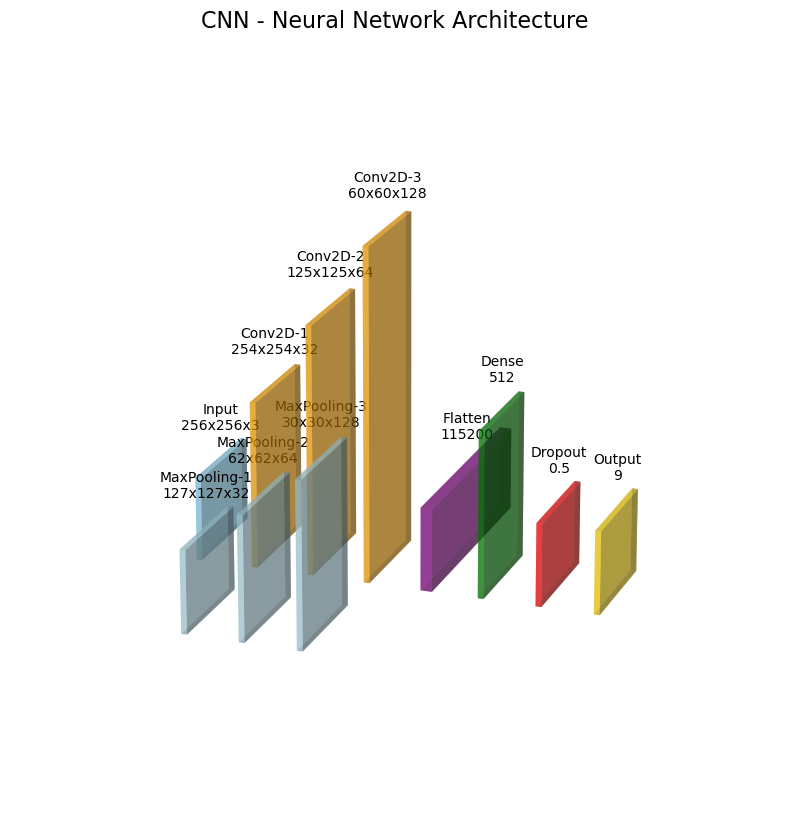

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from skimage.transform import resize  # Import the resize function
from matplotlib.offsetbox import OffsetImage, AnnotationBbox  # Import necessary classes


# Define the alpha transparency for the bars
alpha = 0.5

# Define colors for each layer type
colors = [
    'skyblue',  # Input Layer
    'orange',   # Conv1
    'lightblue',# Pool1
    'orange',   # Conv2
    'lightblue',# Pool2
    'orange',   # Conv3
    'lightblue',# Pool3
    'purple',   # Flatten
    'green',    # Dense
    'red',      # Dropout
    'gold'      # Output
]

# Define labels for each layer
labels = [
    'Input\n256x256x3',
    'Conv2D-1\n254x254x32',
    'MaxPooling-1\n127x127x32',
    'Conv2D-2\n125x125x64',
    'MaxPooling-2\n62x62x64',
    'Conv2D-3\n60x60x128',
    'MaxPooling-3\n30x30x128',
    'Flatten\n115200',
    'Dense\n512',
    'Dropout\n0.5',
    'Output\n9'
]

# Begin the plot
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')

# Increased spacing between layers
layer_spacing = 8

# Layer parameters (x, y, z, width, depth, height)
layer_params = [
    (1 * layer_spacing, 0, 0, 0.8, 0.8, 0.1), # Input Layer
    (2 * layer_spacing, 0, 0, 0.8, 0.8, 0.2), # Conv1
    (2 * layer_spacing, -1.2, 0, 0.8, 0.8, 0.1), # Pool1
    (3 * layer_spacing, 0, 0, 0.8, 0.8, 0.3), # Conv2
    (3 * layer_spacing, -1.2, 0, 0.8, 0.8, 0.15), # Pool2
    (4 * layer_spacing, 0, 0, 0.8, 0.8, 0.4), # Conv3
    (4 * layer_spacing, -1.2, 0, 0.8, 0.8, 0.2), # Pool3
    (5 * layer_spacing, 0, 0, 1.6, 1.6, 0.1), # Flatten
    (6 * layer_spacing, 0, 0, 0.8, 0.8, 0.2), # Dense
    (7 * layer_spacing, 0, 0, 0.8, 0.8, 0.1), # Dropout
    (8 * layer_spacing, 0, 0, 0.8, 0.8, 0.1)  # Output
]


# Create the bars and labels for each layer
for i, (x, y, z, dx, dy, dz) in enumerate(layer_params):
    ax.bar3d(x, y, z, dx, dy, dz, color=colors[i], alpha=alpha)
    ax.text(x + dx/2, y + dy/2, dz + 0.05, labels[i], color='black', ha='center', va='center', fontsize=10)

# Set the view to a perspective that shows the 3D effect while maintaining a 2D-like readability
ax.view_init(elev=20, azim=-70)

# Remove the grid, axis and background to enhance the 2D appearance
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')

# Add a title to the graph
ax.set_title('CNN - Neural Network Architecture', fontsize=16)

# Show the plot
plt.show()

In [3]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Projet_Blood_Cells_Classification/data/GROUPED_IMAGES_PBC_APL/model-21-0.89.h5')

In [6]:
# Chemin du répertoire principal de vos images
test_dir = '/content/drive/MyDrive/Projet_Blood_Cells_Classification/data/GROUPED_IMAGES_PBC_APL/GROUPED_IMAGES_PBC_APL_test'


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Générateur d'images pour l'entraînement
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des images

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 2880 images belonging to 9 classes.


In [7]:
predictions_test = model.predict(test_generator, steps=len(test_generator), verbose=1)

90/90 [==============================] - 898s 10s/step


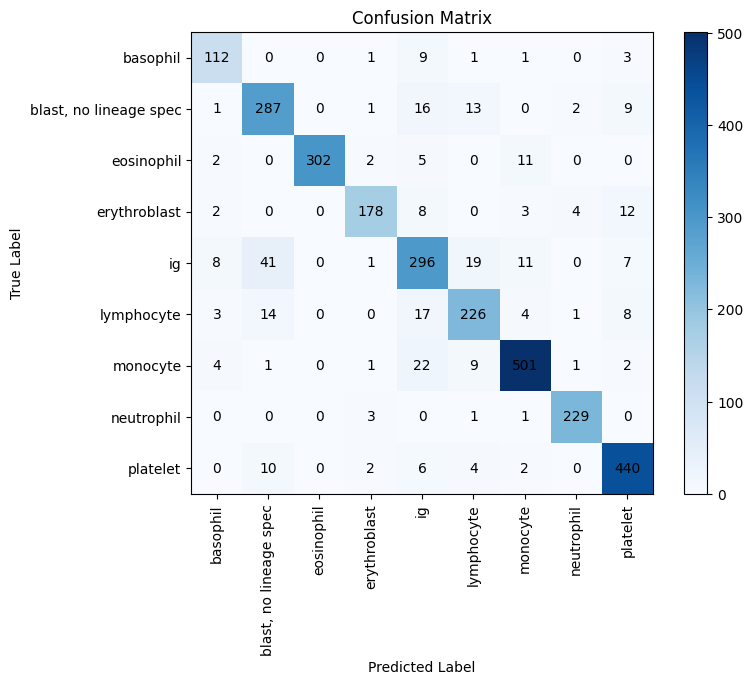

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Prédire les classes pour l'ensemble de validation
y_pred_test = np.argmax(predictions_test, axis=1)
y_true_test = test_generator.classes

# Calculer la matrice de confusion
confusion_mtx = confusion_matrix(y_true_test, y_pred_test)

# Obtenez les noms des classes dans l'ordre
class_names = {"basophil": 0,
            "blast, no lineage spec": 1,
            "eosinophil": 2,
            "erythroblast": 3,
            "ig": 4,
            "lymphocyte": 8,
            "monocyte": 5,
            "neutrophil": 6,
            "platelet": 7,
        }

# Calculer la matrice de confusion
confusion_mtx = confusion_matrix(y_true_test, y_pred_test)

# Afficher la matrice de confusion avec Matplotlib imshow
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Définir les étiquettes des axes avec rotation à 45 degrés
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Ajouter les valeurs dans les cellules
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(confusion_mtx[i, j]), ha='center', va='center')

# Faire pivoter les étiquettes du bas à 90 degrés
plt.xticks(rotation=90)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true_test, y_pred_test, target_names=class_names))

Classification Report:
                        precision    recall  f1-score   support

              basophil       0.85      0.88      0.86       127
blast, no lineage spec       0.81      0.87      0.84       329
            eosinophil       1.00      0.94      0.97       322
          erythroblast       0.94      0.86      0.90       207
                    ig       0.78      0.77      0.78       383
            lymphocyte       0.83      0.83      0.83       273
              monocyte       0.94      0.93      0.93       541
            neutrophil       0.97      0.98      0.97       234
              platelet       0.91      0.95      0.93       464

              accuracy                           0.89      2880
             macro avg       0.89      0.89      0.89      2880
          weighted avg       0.89      0.89      0.89      2880



In [19]:
# Function to apply Guided Grad-CAM on a specific image
def apply_guided_grad_cam(model, img_path, layer_name, target_size):
    # Load and preprocess the image

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Create the gradient model
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    # Use GradientTape to compute gradients
    with tf.GradientTape() as tape:
        inputs = tf.cast(img_array, tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, 0]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)

    # Compute guided gradients
    cast_conv_outputs = tf.cast(conv_outputs > 0, "float32")
    cast_grads = tf.cast(grads > 0, "float32")
    guided_grads = cast_conv_outputs * cast_grads * grads

    # Remove batch dimension
    conv_outputs = conv_outputs[0]
    guided_grads = guided_grads[0]

    # Compute weights
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    # Compute CAM
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

    # Grab spatial dimensions of the input image and resize the CAM
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= heatmap.max()

    return heatmap

# Choose the layer for Guided Grad-CAM
guided_grad_cam_layer = "conv2d_8"  # You may need to adjust this based on your model architecture

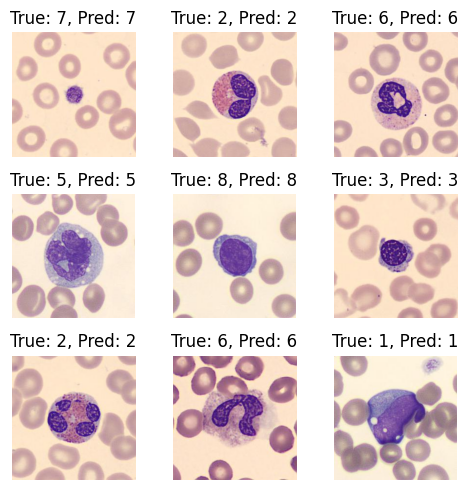

In [36]:
# Get indices of correctly predicted samples
correct_indices = np.where(y_pred_test == y_true_test)[0]

# Randomly select 9 correct samples
random_correct_indices = np.random.choice(correct_indices, 9, replace=False)

# Display the images
plt.figure(figsize=(5,5))
for i, idx in enumerate(random_correct_indices):
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {y_true_test[idx]}, Pred: {y_pred_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

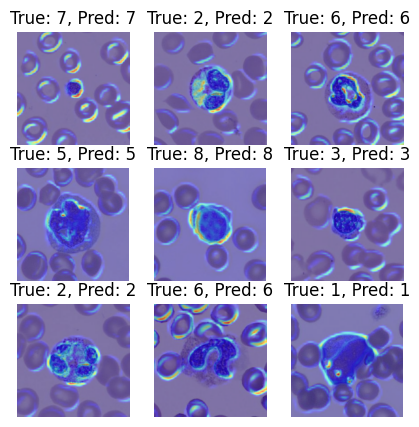

In [37]:
# Display the Guided Grad-CAM for each image along with the original image
plt.figure(figsize=(5,5))
from tensorflow.keras.preprocessing import image
import cv2
image_size=(256,256)
batch_size=32
for i in range(9):
    batch_index = random_correct_indices[i] // batch_size
    image_index_in_batch = random_correct_indices[i] % batch_size
    img_path = test_generator.filepaths[batch_index * batch_size + image_index_in_batch]

    # Load the original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Apply Guided Grad-CAM
    guided_grad_cam_result = apply_guided_grad_cam(model, img_path, guided_grad_cam_layer, image_size)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(guided_grad_cam_result, (original_img.shape[1], original_img.shape[0]))

    # Normalize the heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(original_img, 0.5, heatmap_rgb, 0.5, 0)

    plt.subplot(3, 3, i + 1)
    plt.imshow(superimposed_img)
    plt.title(f"True: {y_true_test[random_correct_indices[i]]}, Pred: {y_pred_test[random_correct_indices[i]]}")
    plt.axis('off')

plt.show()


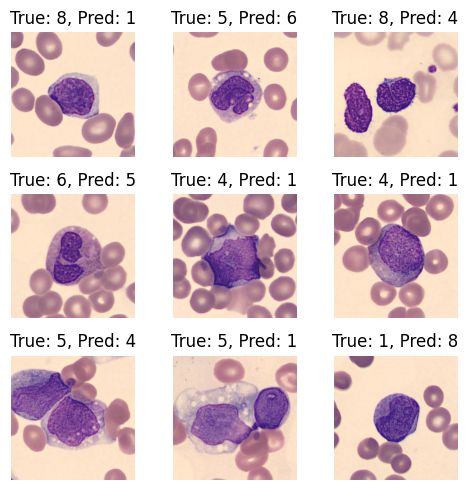

In [24]:
# Get indices of correctly predicted samples
incorrect_indices = np.where(y_pred_test != y_true_test)[0]

# Randomly select 9 correct samples
random_incorrect_indices = np.random.choice(incorrect_indices, 9, replace=False)

# Display the images
plt.figure(figsize=(5,5))
for i, idx in enumerate(random_incorrect_indices):
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {y_true_test[idx]}, Pred: {y_pred_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


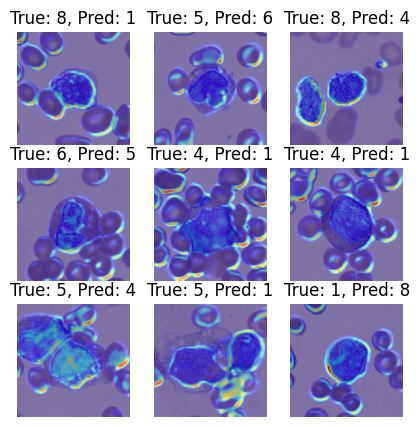

In [25]:
# Display the Guided Grad-CAM for each image along with the original image
plt.figure(figsize=(5,5))
for i in range(9):
    batch_index = random_incorrect_indices[i] // batch_size
    image_index_in_batch = random_incorrect_indices[i] % batch_size
    img_path = test_generator.filepaths[batch_index * batch_size + image_index_in_batch]

    # Load the original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Apply Guided Grad-CAM
    guided_grad_cam_result = apply_guided_grad_cam(model, img_path, guided_grad_cam_layer, image_size)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(guided_grad_cam_result, (original_img.shape[1], original_img.shape[0]))

    # Normalize the heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(original_img, 0.5, heatmap_rgb, 0.5, 0)

    plt.subplot(3, 3, i + 1)
    plt.imshow(superimposed_img)
    plt.title(f"True: {y_true_test[random_incorrect_indices[i]]}, Pred: {y_pred_test[random_incorrect_indices[i]]}")
    plt.axis('off')

plt.show()
